In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def create_mlp(dims, activation='relu', final_activation='log_softmax'):
    assert len(dims) >= 2
    if isinstance(activation, str):
        activation = [activation] * (len(dims) - 2)
    if isinstance(activation, list):
        assert len(activation) == len(dims) - 2

    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(dims[0],)))
    for dim, active in zip(dims[1:-1], activation):
        model.add(tf.keras.layers.Dense(dim, activation=active))
    model.add(tf.keras.layers.Dense(dims[-1], activation=final_activation))

    model.summary()

    return model

In [67]:
X = np.linspace(-100, 100, 1000)
Y = X * X * X
X = X.reshape((-1, 1))
print(X.shape)

model = create_mlp([1, 128, 128, 1], activation=['relu', 'relu'], final_activation='linear')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError())
model.fit(X, Y, epochs=1000)

(1000, 1)
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_88 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 129       
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 143682961408.0000
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 143578906624.0000
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 143323365376.0000
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 142797242368.0000
E

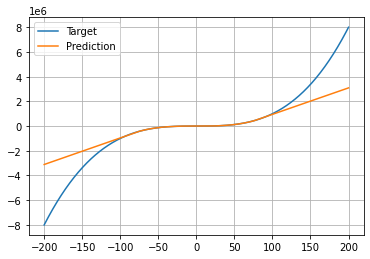

In [69]:
X_test = np.linspace(-200, 200, 1000)
Y_test = X_test * X_test * X_test

Y_pred = model(X_test.reshape((-1, 1)))
plt.plot(X_test, Y_test, label='Target')
plt.plot(X_test, Y_pred, label='Prediction')
plt.legend()
plt.grid(True)
plt.show()